In [12]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [13]:
gen = ImageDataGenerator(rescale=1./255,validation_split = 0.2,zoom_range=(0.99,0.99),dtype=tf.float32)

In [14]:
train = gen.flow_from_directory("../../BrainTumor/Data/DataSet/",
                               target_size = (150,150),
                               batch_size = 256,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "training")
                
val = gen.flow_from_directory("../../BrainTumor/Data/DataSet/",
                               target_size = (150,150),
                               batch_size = 8,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "validation")
classes = val.class_indices

Found 3681 images belonging to 2 classes.
Found 919 images belonging to 2 classes.


In [15]:
classes

{'BrainTumor': 0, 'Healthy': 1}

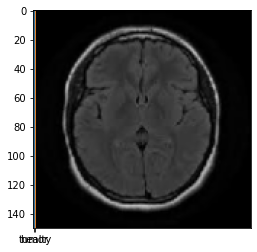

In [16]:
t=0
h=0
for i in range(15):
    a, b = next(train)
    for j in b:
        if j == 1:
            h+=1
        else:t+=1

sns.barplot(x=['tumor','healty'],y=[t,h])
import matplotlib.pyplot as plt
batch = next(train)

plt.imshow(batch[0][0])

In [17]:
from keras.layers import Conv2D, MaxPool2D, LeakyReLU, BatchNormalization, Dropout, Dense, InputLayer, Flatten, Input
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam, SGD
from keras.applications.resnet50 import ResNet50
from keras.models import Sequential
from tensorflow.keras import layers

In [24]:
#AlexNet
model = Sequential()
model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
    
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer=SGD(0.001),loss = BinaryCrossentropy(),metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 35, 35, 96)        34944     
_________________________________________________________________
batch_normalization_25 (Batc (None, 35, 35, 96)        384       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 96)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 17, 17, 256)       614656    
_________________________________________________________________
batch_normalization_26 (Batc (None, 17, 17, 256)       1024      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 8, 8, 384)        

In [19]:
from keras import utils, callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", 
                                        patience=5, restore_best_weights = True)

In [25]:
history = model.fit(train,verbose=1,callbacks = [earlystopping],epochs=20,validation_data=(val), validation_freq=1)

Epoch 1/20
15/15 [==============================] - 79s 5s/step - loss: 1.0096 - accuracy: 0.5520 - val_loss: 0.6911 - val_accuracy: 0.5462
Epoch 2/20
15/15 [==============================] - 76s 5s/step - loss: 0.8347 - accuracy: 0.6134 - val_loss: 0.6900 - val_accuracy: 0.5462
Epoch 3/20
15/15 [==============================] - 76s 5s/step - loss: 0.7102 - accuracy: 0.6705 - val_loss: 0.6892 - val_accuracy: 0.5462
Epoch 4/20
15/15 [==============================] - 75s 5s/step - loss: 0.6764 - accuracy: 0.6955 - val_loss: 0.6889 - val_accuracy: 0.5462
Epoch 5/20
15/15 [==============================] - 87s 6s/step - loss: 0.6346 - accuracy: 0.7107 - val_loss: 0.6868 - val_accuracy: 0.5462
Epoch 6/20
15/15 [==============================] - 81s 5s/step - loss: 0.6062 - accuracy: 0.7302 - val_loss: 0.6870 - val_accuracy: 0.5462
Epoch 7/20
15/15 [==============================] - 81s 5s/step - loss: 0.5239 - accuracy: 0.7601 - val_loss: 0.6861 - val_accuracy: 0.5462
Epoch 8/20
15/15 [==

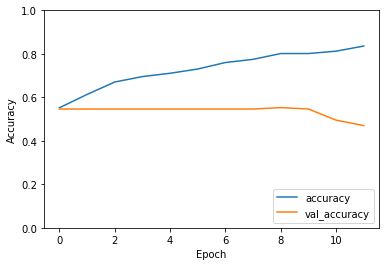

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')


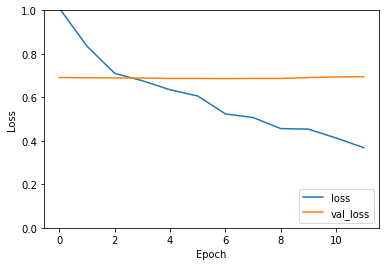

In [27]:

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [28]:
gen = ImageDataGenerator(rescale=1./255,zoom_range=(0.99,0.99),dtype=tf.float32)
test = gen.flow_from_directory("../../Test/DataSet/",
                               target_size = (150,150),
                               batch_size = 256,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "training")

classes = val.class_indices

Found 245 images belonging to 2 classes.


In [29]:
_, acc  = model.evaluate(test, verbose=1)

1/1 [==============================] - 0s 998us/step - loss: 0.6731 - accuracy: 0.6286
